In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import spikeinterface.full as si

%matplotlib inline

Matplotlib created a temporary cache directory at /tmp/matplotlib-1z9z2gga because the default path (/home/jupyter-ikharitonov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# https://open-ephys.github.io/gui-docs/User-Manual/Recording-data/Binary-format.html

In [ ]:
# https://github.com/SpikeInterface/probeinterface/issues/85

In [3]:
# IBL
# https://int-brain-lab.github.io/iblenv/notebooks_external/data_structure.html
# https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815
# downloading https://dandiarchive.org/dandiset/000409/draft/files?location=sub-CSHL051
# https://ibl.flatironinstitute.org/public/

# ALTERNATIVELY
# Stream IBL data
# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_ibl_streaming_recording

In [24]:
base_folder = Path.home() / 'RANCZLAB-NAS' / 'iakov'
output_folder = Path.home() / 'RANCZLAB-NAS' / 'iakov' / 'trial_allen_sorting_kilosort3'

In [26]:
# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_binary
# recording = si.read_binary(base_folder / 'test_recording2.dat', sampling_frequency=32000, dtype=np.int16, num_chan=384)

# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_openephys
# recording = si.read_openephys()

# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_nwb
recording = si.read_nwb(file_path = base_folder / 'sorting_pipeline_optimisation_oct_2023' / 'sub-CSHL051_ses-ecb5520d-1358-434c-95ec-93687ecd1396_behavior+ecephys+image.nwb')

# https://spikeinterface.readthedocs.io/en/latest/api.html#spikeinterface.extractors.read_ibl_streaming_recording
# recording = si.read_ibl_streaming_recording(session='ebe090af-5922-4fcd-8fc6-17b8ba7bad6d', stream_name='')

OSError: Unable to synchronously open file (truncated file: eof = 33969885505, sblock->base_addr = 0, stored_eof = 103434602113)

In [20]:
si.StreamingIblExtractor

AttributeError: module 'spikeinterface.full' has no attribute 'StreamingIblExtractor'

In [7]:
recording

BinaryRecordingExtractor: 384 channels - 32.0kHz - 1 segments - 115,200,000 samples 
                          3,600.00s (1.00 hours) - int16 dtype - 82.40 GiB
  file_paths: ['/home/jupyter-ikharitonov/RANCZLAB-NAS/test_recording2.dat']

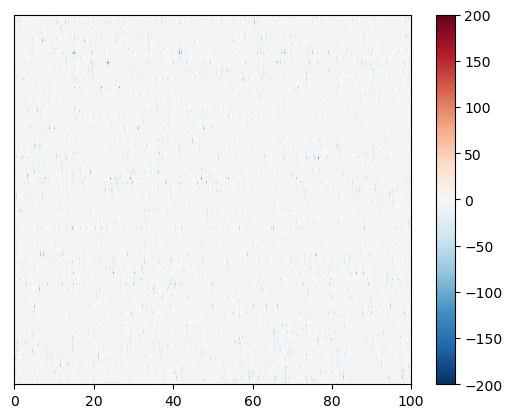

In [8]:
si.plot_traces(recording, mode='map', time_range=[0, 100], backend="matplotlib")

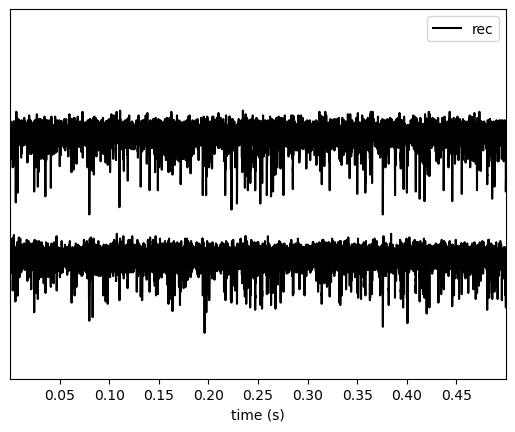

In [19]:
si.plot_traces(recording, time_range=[0, 0.5], channel_ids=[200,201], backend="matplotlib")

In [10]:
recording_f = si.bandpass_filter(recording, freq_min=300, freq_max=9000)

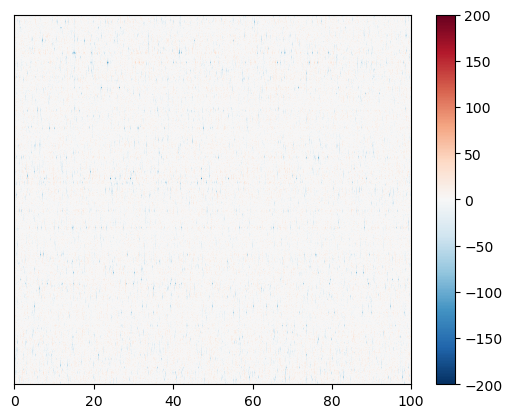

In [11]:
si.plot_traces(recording_f, mode='map', time_range=[0, 100], backend="matplotlib")

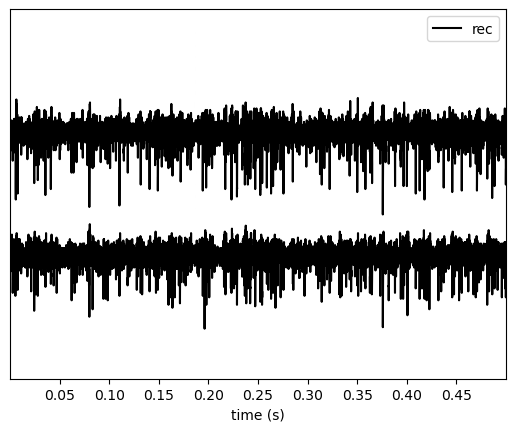

In [12]:
si.plot_traces(recording_f, time_range=[0, 0.5], channel_ids=[200,201], backend="matplotlib")

In [13]:
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')

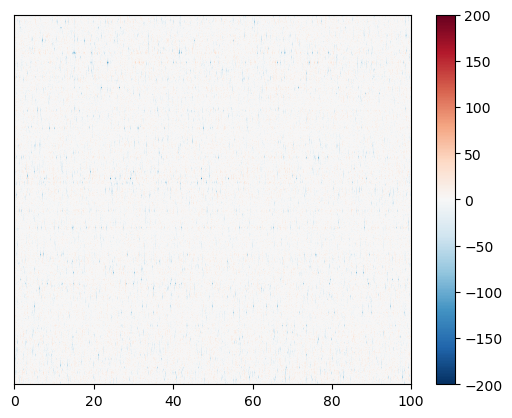

In [14]:
si.plot_traces(recording_cmr, mode='map', time_range=[0, 100], backend="matplotlib")

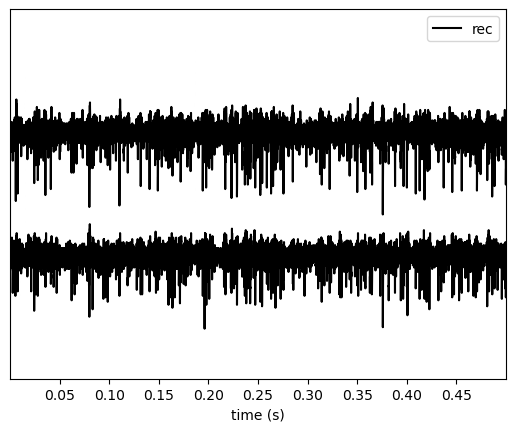

In [15]:
si.plot_traces(recording_cmr, time_range=[0, 0.5], channel_ids=[200,201], backend="matplotlib")

In [17]:
sorting = si.run_sorter('kilosort3', recording=recording, output_folder=output_folder, singularity_image=base_folder / 'spikesorter_images' / 'kilosort3-compiled-base.sif', verbose=True)

Starting container
Installing spikeinterface from sources in /home/jupyter-ikharitonov/RANCZLAB-NAS/spikesorter_images/kilosort3-compiled-base.sif
Installing dev spikeinterface from remote repository
Running kilosort3 sorter inside /home/jupyter-ikharitonov/RANCZLAB-NAS/spikesorter_images/kilosort3-compiled-base.sif
Stopping container


SpikeSortingError: Spike sorting in singularity failed with the following error:
Traceback (most recent call last):
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_sorter_script.py", line 17, in <module>
    sorting = run_sorter_local(
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_python_base/lib/python3.8/site-packages/spikeinterface/sorters/runsorter.py", line 173, in run_sorter_local
    SorterClass.setup_recording(recording, output_folder, verbose=verbose)
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_python_base/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 225, in setup_recording
    cls._setup_recording(recording, sorter_output_folder, sorter_params, verbose)
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_python_base/lib/python3.8/site-packages/spikeinterface/sorters/external/kilosortbase.py", line 123, in _setup_recording
    cls._generate_channel_map_file(recording, sorter_output_folder)
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_python_base/lib/python3.8/site-packages/spikeinterface/sorters/external/kilosortbase.py", line 45, in _generate_channel_map_file
    positions = np.array(recording.get_channel_locations())
  File "/mnt/nas-disk/RANCZLAB-NAS/in_container_python_base/lib/python3.8/site-packages/spikeinterface/core/baserecordingsnippets.py", line 329, in get_channel_locations
    raise Exception("There are no channel locations")
Exception: There are no channel locations


In [ ]:
w = si.plot_rasters(sorting, mode='map', time_range=[10, 10.1], backend="matplotlib")

In [ ]:
soring_curated = si.threshold_num_spikes(sorting, threshold=100, threshold_sign='less')

In [ ]:
si.export_to_phy(recording, sorting_curated, output_folder='phy_output')